# Introduction

This notebook presents **Convolutional Neural Network** applied to [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset.

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Limit TensorFlow GPU memory usage


In [2]:
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
with tf.Session(config=config):
    pass  # init sessin with allow_growth

# CIFAR-10 Dataset

In [17]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tf.keras.datasets.cifar10.load_data()
class2txt = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

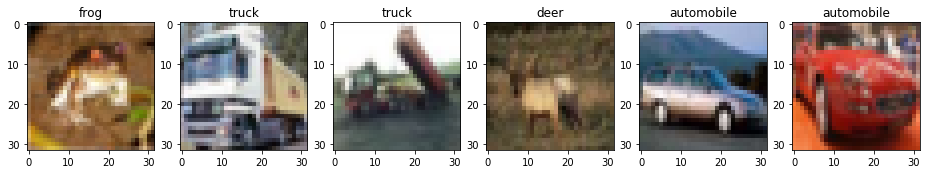

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=[16, 9])
for i in range(len(axes)):
    axes[i].set_title(class2txt[y_train_raw[i, 0]])
    axes[i].imshow(x_train_raw[i])

In [37]:
x_train = (x_train_raw - x_train_raw.mean()) / x_train_raw.std()
x_test = (x_test_raw - x_train_raw.mean()) / x_train_raw.std()
print('x_train.shape', x_train.shape)
print('x_test.shape', x_test.shape)

x_train.shape (50000, 32, 32, 3)
x_test.shape (10000, 32, 32, 3)


In [39]:
y_train = tf.keras.utils.to_categorical(y_train_raw, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test_raw, num_classes=10)
print('y_train.shape', y_train.shape)
print(y_train[:3])

y_train.shape (50000, 10)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# Batch Norm after

In [120]:
model = tf.keras.Sequential()
model.add(InputLayer(input_shape=[32, 32, 3]))

model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation=None, use_bias=False))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=[2,2], strides=[2, 2], padding='same'))

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation=None, use_bias=False))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=[2,2], strides=[2, 2], padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation=None, use_bias=False))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=[2,2], strides=[2, 2], padding='same'))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='elu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 32, 32, 16)        432       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 16, 16, 32)        4608      
_________________________________________________________________
activation_8 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 16, 16, 32)        128       
__________

In [121]:
cback = Callback()
model.fit(x=x_train, y=y_train, batch_size=250, epochs=10, callbacks=[cback])

Epoch 1/10
50000/50000 [==============================] - 4s 86us/step - loss: 1.6475 - acc: 0.4499
train_loss 1.222	 train_acc 0.56	test_loss{test_loss:.3f}	 test_acc {test_acc:.2f}
Epoch 2/10
50000/50000 [==============================] - 3s 65us/step - loss: 1.1806 - acc: 0.5854
train_loss 0.910	 train_acc 0.68	test_loss{test_loss:.3f}	 test_acc {test_acc:.2f}
Epoch 3/10
50000/50000 [==============================] - 3s 66us/step - loss: 1.0034 - acc: 0.6437
train_loss 0.773	 train_acc 0.73	test_loss{test_loss:.3f}	 test_acc {test_acc:.2f}
Epoch 4/10
50000/50000 [==============================] - 3s 65us/step - loss: 0.8985 - acc: 0.6817
train_loss 0.703	 train_acc 0.75	test_loss{test_loss:.3f}	 test_acc {test_acc:.2f}
Epoch 5/10
50000/50000 [==============================] - 3s 66us/step - loss: 0.8145 - acc: 0.7117
train_loss 0.620	 train_acc 0.79	test_loss{test_loss:.3f}	 test_acc {test_acc:.2f}
Epoch 6/10
50000/50000 [==============================] - 3s 65us/step - loss: 0.7519

In [122]:
loss, acc = model.evaluate(x_train, y_train, batch_size=250, verbose=0)
print(f'Accuracy on train set: {acc:.3f}')
loss, acc = model.evaluate(x_test, y_test, batch_size=250, verbose=0)
print(f'Accuracy on test set:  {acc:.3f}')

Accuracy on train set: 0.870
Accuracy on test set:  0.769


# Batch Norm test

In [123]:
model = tf.keras.Sequential()
model.add(InputLayer(input_shape=[32, 32, 3]))

model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation=None, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=[2,2], strides=[2, 2], padding='same'))

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation=None, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=[2,2], strides=[2, 2], padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation=None, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=[2,2], strides=[2, 2], padding='same'))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='elu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 32, 32, 16)        432       
_________________________________________________________________
batch_normalization_17 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 16, 16, 32)        4608      
_________________________________________________________________
batch_normalization_18 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
activation_11 (Activation)   (None, 16, 16, 32)        0         
__________

In [124]:
class Callback(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.hist = {'train_loss':[], 'train_acc':[], 'test_loss':[], 'test_acc':[]}
    def on_epoch_end(self, batch, logs={}):
        train_loss, train_acc = model.evaluate(x_train[:10000], y_train[:10000], batch_size=250, verbose=0)
        self.hist['train_loss'].append(train_loss)
        self.hist['train_acc'].append(train_acc)
        test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=250, verbose=0)
        self.hist['test_loss'].append(test_loss)
        self.hist['test_acc'].append(test_acc)
        print(f'train_loss {train_loss:.3f}\t train_acc {train_acc:.2f}\t'
               'test_loss{test_loss:.3f}\t test_acc {test_acc:.2f}')

In [125]:
cback = Callback()
model.fit(x=x_train, y=y_train, batch_size=250, epochs=10, callbacks=[cback])

Epoch 1/10
50000/50000 [==============================] - 4s 89us/step - loss: 1.6334 - acc: 0.4459
train_loss 1.541	 train_acc 0.44	test_loss{test_loss:.3f}	 test_acc {test_acc:.2f}
Epoch 2/10
50000/50000 [==============================] - 3s 65us/step - loss: 1.1901 - acc: 0.5792
train_loss 0.973	 train_acc 0.65	test_loss{test_loss:.3f}	 test_acc {test_acc:.2f}
Epoch 3/10
50000/50000 [==============================] - 3s 65us/step - loss: 1.0181 - acc: 0.6421
train_loss 0.819	 train_acc 0.71	test_loss{test_loss:.3f}	 test_acc {test_acc:.2f}
Epoch 4/10
50000/50000 [==============================] - 3s 65us/step - loss: 0.9140 - acc: 0.6768
train_loss 0.754	 train_acc 0.73	test_loss{test_loss:.3f}	 test_acc {test_acc:.2f}
Epoch 5/10
50000/50000 [==============================] - 3s 65us/step - loss: 0.8457 - acc: 0.7033
train_loss 0.680	 train_acc 0.76	test_loss{test_loss:.3f}	 test_acc {test_acc:.2f}
Epoch 6/10
50000/50000 [==============================] - 3s 65us/step - loss: 0.7939

In [126]:
loss, acc = model.evaluate(x_train, y_train, batch_size=250, verbose=0)
print(f'Accuracy on train set: {acc:.3f}')
loss, acc = model.evaluate(x_test, y_test, batch_size=250, verbose=0)
print(f'Accuracy on test set:  {acc:.3f}')

Accuracy on train set: 0.839
Accuracy on test set:  0.765


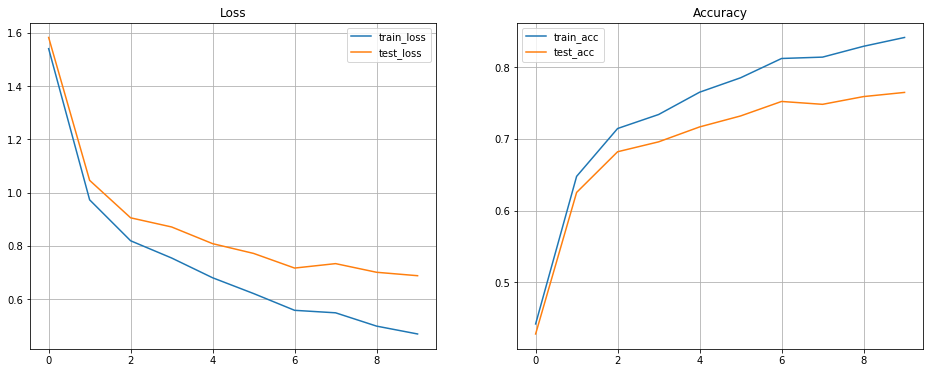

In [127]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[16, 6])
axes[0].plot(cback.hist['train_loss'], label='train_loss')
axes[0].plot(cback.hist['test_loss'], label='test_loss')
axes[0].set_title('Loss')
axes[0].legend()
axes[0].grid()
axes[1].plot(cback.hist['train_acc'], label='train_acc')
axes[1].plot(cback.hist['test_acc'], label='test_acc')
axes[1].set_title('Accuracy')
axes[1].legend()
axes[1].grid()

# Keras Model

In [104]:
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization

model = tf.keras.Sequential()
model.add(InputLayer(input_shape=[32, 32, 3]))
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=[2,2], strides=[2, 2], padding='same'))

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=[2,2], strides=[2, 2], padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=[2,2], strides=[2, 2], padding='same'))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='elu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 4, 4, 64)          0         
__________

In [105]:
class Callback(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.hist = {'train_loss':[], 'train_acc':[], 'test_loss':[], 'test_acc':[]}
    def on_epoch_end(self, batch, logs={}):
        train_loss, train_acc = model.evaluate(x_train[:10000], y_train[:10000], batch_size=250, verbose=0)
        self.hist['train_loss'].append(train_loss)
        self.hist['train_acc'].append(train_acc)
        test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=250, verbose=0)
        self.hist['test_loss'].append(test_loss)
        self.hist['test_acc'].append(test_acc)
        print(f'train_loss {train_loss:.3f}\t train_acc {train_acc:.2f}\t'
               'test_loss{test_loss:.3f}\t test_acc {test_acc:.2f}')

In [106]:
cback = Callback()
model.fit(x=x_train, y=y_train, batch_size=250, epochs=10, callbacks=[cback])

Epoch 1/10
50000/50000 [==============================] - 3s 69us/step - loss: 1.4654 - acc: 0.4778
train_loss 1.135	 train_acc 0.60	test_loss{test_loss:.3f}	 test_acc {test_acc:.2f}
Epoch 2/10
50000/50000 [==============================] - 3s 56us/step - loss: 1.1456 - acc: 0.5979
train_loss 0.991	 train_acc 0.66	test_loss{test_loss:.3f}	 test_acc {test_acc:.2f}
Epoch 3/10
50000/50000 [==============================] - 3s 56us/step - loss: 1.0387 - acc: 0.6374
train_loss 0.887	 train_acc 0.70	test_loss{test_loss:.3f}	 test_acc {test_acc:.2f}
Epoch 4/10
50000/50000 [==============================] - 3s 55us/step - loss: 0.9687 - acc: 0.6633
train_loss 0.839	 train_acc 0.71	test_loss{test_loss:.3f}	 test_acc {test_acc:.2f}
Epoch 5/10
50000/50000 [==============================] - 3s 56us/step - loss: 0.9233 - acc: 0.6771
train_loss 0.775	 train_acc 0.74	test_loss{test_loss:.3f}	 test_acc {test_acc:.2f}
Epoch 6/10
50000/50000 [==============================] - 3s 56us/step - loss: 0.8826

In [107]:
loss, acc = model.evaluate(x_train, y_train, batch_size=250, verbose=0)
print(f'Accuracy on train set: {acc:.3f}')
loss, acc = model.evaluate(x_test, y_test, batch_size=250, verbose=0)
print(f'Accuracy on test set:  {acc:.3f}')

Accuracy on train set: 0.787
Accuracy on test set:  0.723


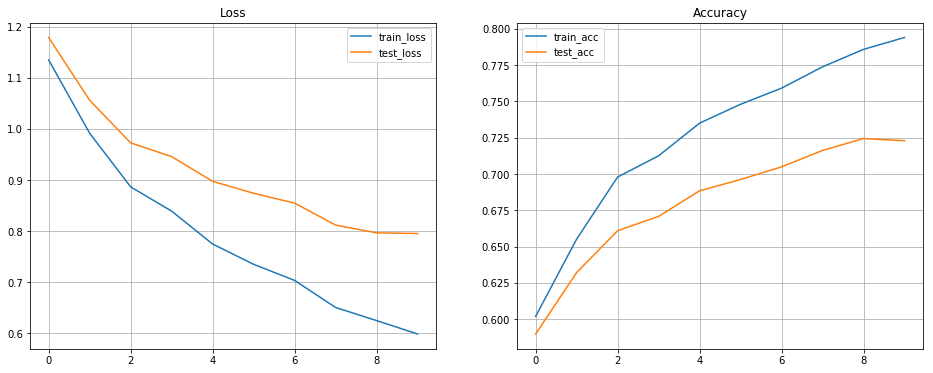

In [108]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[16, 6])
axes[0].plot(cback.hist['train_loss'], label='train_loss')
axes[0].plot(cback.hist['test_loss'], label='test_loss')
axes[0].set_title('Loss')
axes[0].legend()
axes[0].grid()
axes[1].plot(cback.hist['train_acc'], label='train_acc')
axes[1].plot(cback.hist['test_acc'], label='test_acc')
axes[1].set_title('Accuracy')
axes[1].legend()
axes[1].grid()